<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

#####Suppose that you are conducting a scientific experiment where you are observing the effects of one variable (x_train.npy and x_test.npy) on the output (y_train.npy and y_test.npy). On visualizing the relationship between the variables, you see the following plot: <br>
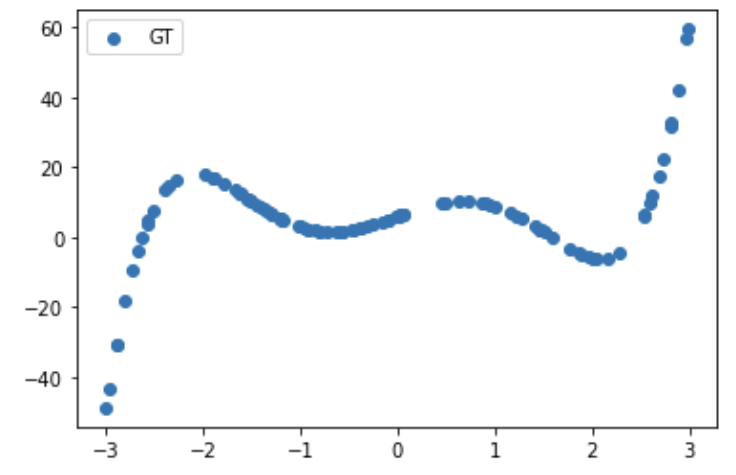 <br>
#####Your goal is to come up with a linear regression model that can take the training data (x_train.npy and y_train.npy) and model the relationship between the variables x and y. You should implement your own version of linear regression either using gradient descent or normal equations. **You SHOULD NOT use any pre-packaged library such as Sci-Kit Learn.** <br>
#####Here are somethings to keep in mind for tackling this problem: <br>
1.   Try to plot this relationship on your own using matplotlib. You can also visualize the test data to see if it gives you any clues about the underlying relationship between the variables. <br>
2.   Use your knowledge gleaned from the previous step to answer the following questions: <br>
> a. Is the relationship linear? <br>
> b. Do you need feature engineering to add any non-linearity? <br>
>> i. If so, how can you engineer these features? <br>
>> ii. What are some functions that you can try? <br>
>>> 1. Plot each of them individually to verify! <br>
#####You will need to write a short report detailing your thought process, the code you wrote in Python to implement the linear regression model and the equation that models the relationship between x and y that you found. You should provide evidence that corroborates your final statement such as plots prediction errors, etc.

**Solution 1**

**Libraries**

In [490]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

**Loading Data**

**Train Data**

In [491]:
x_train = np.load('/content/sample_data/x_train.npy')
y_train = np.load('/content/sample_data/y_train.npy')

**Test Data**

In [492]:
x_test = np.load('/content/sample_data/x_test.npy')
y_test = np.load('/content/sample_data/y_test.npy')

**Data Type**

In [493]:
# Show Data Type
print('Data type:', type(x_train))
print('x_train Data Shape:', x_train.shape)
print('y_train Data Shape:', y_train.shape)
print('x_test Data Shape:', x_test.shape)
print('y_test Data Shape:', y_test.shape)

Data type: <class 'numpy.ndarray'>
x_train Data Shape: (100, 1)
y_train Data Shape: (100,)
x_test Data Shape: (100, 1)
y_test Data Shape: (100, 1)


**1.1 Data Visualization**

Text(0.5, 1.0, 'Relationship between x_train and y_train')

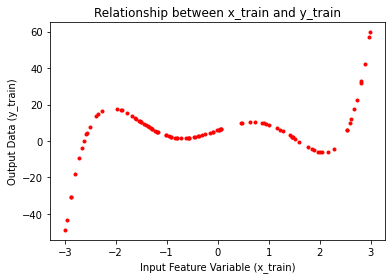

In [494]:
# Plotting Relationship between x_train and y_train
plt.plot(x_train,y_train,'r.')
plt.xlabel('Input Feature Variable (x_train)')
plt.ylabel('Output Data (y_train)')
plt.title('Relationship between x_train and y_train')

Text(0.5, 1.0, 'Relationship between x_test and y_test')

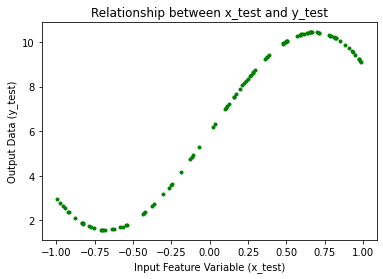

In [495]:
# Plotting Relationship between x_test and y_test
plt.plot(x_test,y_test,'g.')
plt.xlabel('Input Feature Variable (x_test)')
plt.ylabel('Output Data (y_test)')
plt.title('Relationship between x_test and y_test')

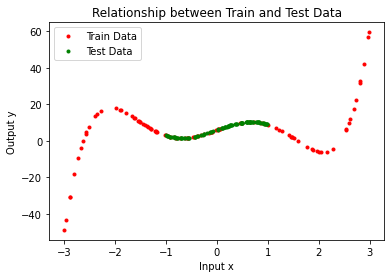

In [496]:
# Plotting Relationship between Train and Test Data
plt.plot(x_train,y_train,'r.')
plt.plot(x_test,y_test,'g.')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title("Relationship between Train and Test Data")
plt.legend(['Train Data', 'Test Data'],loc='upper left')
plt.show()

**1.2a Is the Relationship Linear?**

#####From the graphs shown above, the relationship is not linear between the variables. The data represent nearly sine shape or polynomial graphs rather than straight lines. So, linear relationship doesn't exists between x and y.


**1.2b Do you need feature engineering to add any non-linearity?**

#####The relationship is non-linear between the variables. So, Yes, we need do feature engineering to add non-linearity to model input and output data.


**1.2bi If so, how can you engineer these features?**

#####We can apply basis function to extract features. Along with the original features, we can add more features as basis function like polynomial basis function which are deterministic of the original features. 

**1.2bii What are some functions that you can try?**

#####We can try Linear or Polynomial basis functions. <br>
#####As the relationship is non-linear between the variables, linear basis function may not model the data well. But Polynomial basis function may work well for modeling single variable x. As we have only one feature, we will add more polynomial features (x^2, x^3 and so on). At the end, we will compare between the basis functions based on the error and conclude which one gives better modeling for our data.

**1.2bii1 Plot each of them individually to verify!**

**Linear Regression Model with Normal Equation**

[2.93532665]
[6.19321416 3.30656683]
[[6.16198724]
 [5.38641385]]


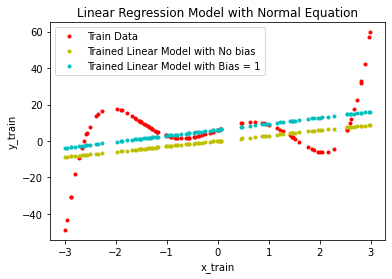

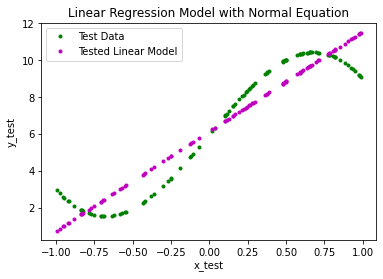

In [497]:
# No Bias
theta_nb = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print(theta_nb)
y_pred_nb = x_train.dot(theta_nb)
# Adding Bias
bias=np.ones((100,1))
# Modeling Train Data
x_train_1=np.append(bias,x_train,axis=1)
theta_train_1 = np.linalg.inv(x_train_1.T.dot(x_train_1)).dot(x_train_1.T).dot(y_train)
print(theta_train_1)
# Modeling Test Data
x_test_1=np.append(bias,x_test,axis=1)
theta_test_1 = np.linalg.inv(x_test_1.T.dot(x_test_1)).dot(x_test_1.T).dot(y_test)
print(theta_test_1)
# Predicted Model
y_train_pred_1 = x_train_1.dot(theta_train_1)
y_test_pred_1 = x_test_1.dot(theta_test_1)
# Plotting Linear Regression Model with Normal Equation using Train Data
f = plt.figure(1)
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,y_pred_nb,'y.')
plt.plot(x_train,y_train_pred_1,'c.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(['Train Data', 'Trained Linear Model with No bias', 'Trained Linear Model with Bias = 1'],loc='upper left')
plt.title('Linear Regression Model with Normal Equation')
f.show()
# Plotting Linear Regression Model with Normal Equation using Test Data
g = plt.figure(2)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_1,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend(['Test Data', 'Tested Linear Model'],loc='upper left')
plt.title('Linear Regression Model with Normal Equation')
g.show()

**Least Square Error for Normal Equation**

In [498]:
lse_nb = np.sum(np.square(y_train - y_pred_nb))/(2*100)
lse_train_1 = np.sum(np.square(y_train - y_train_pred_1))/(2*100)
lse_test_1 = np.sum(np.square(y_test - y_test_pred_1))/(2*100)
print("Least square error for the trained normal equation regression model without bias is "+str(lse_nb))
print("Least square error for the trained 1st order linear regression model is "+str(lse_train_1))
print("Least square error for the tested 1st order linear regression model is "+str(lse_test_1))

Least square error for the trained normal equation regression model without bias is 103.64106754802981
Least square error for the trained 1st order linear regression model is 84.66736319868797
Least square error for the tested 1st order linear regression model is 0.5851539009681812


**Linear Regression Model with 2nd Order Basis Function**

[ 6.25537076  3.3082094  -0.02087222]
[[ 6.382233  ]
 [ 5.39224398]
 [-0.57470419]]


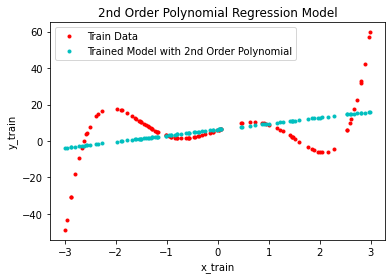

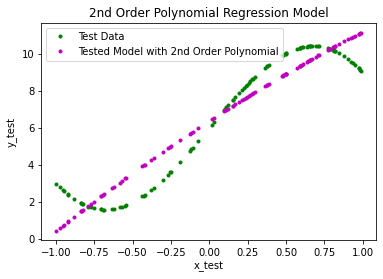

In [499]:
# Adding Square of x as Feature
x_train_square = (x_train**2).reshape(100,1)
x_test_square = (x_test**2).reshape(100,1)
# Modeling Train Data
x_train_2 = np.reshape(x_train_1,(100,2))
x_train_2 = np.append(x_train_2,x_train_square,axis=1)
theta_train_2 = np.linalg.inv(x_train_2.T.dot(x_train_2)).dot(x_train_2.T).dot(y_train)
print(theta_train_2)
# Modeling Test Data
x_test_2 = np.reshape(x_test_1,(100,2))
x_test_2 = np.append(x_test_2,x_test_square,axis=1)
theta_test_2 = np.linalg.inv(x_test_2.T.dot(x_test_2)).dot(x_test_2.T).dot(y_test)
print(theta_test_2)
# Predicted Model
y_train_pred_2 = x_train_2.dot(theta_train_2)
y_test_pred_2 = x_test_2.dot(theta_test_2)
# Plotting Linear Regression Model with 2nd Order Polynomial Basis Function using Train Data
f = plt.figure(3)
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,y_train_pred_2,'c.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(['Train Data','Trained Model with 2nd Order Polynomial'],loc='upper left')
plt.title('2nd Order Polynomial Regression Model')
f.show()
# Plotting Linear Regression Model with 2nd Order Polynomial Basis Function using Test Data
g = plt.figure(4)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_2,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend(['Test Data','Tested Model with 2nd Order Polynomial'],loc='upper left')
plt.title('2nd Order Polynomial Regression Model')
g.show()

**Least Square Error for 2nd Order Basis Function**

In [500]:
lse_train_2 = np.sum(np.square(y_train - y_train_pred_2))/(2*100)
lse_test_2 = np.sum(np.square(y_test - y_test_pred_2))/(2*100)
print("Least square error for the trained 2nd order linear regression model is "+str(lse_train_2))
print("Least square error for the tested 2nd order linear regression model is "+str(lse_test_2))

Least square error for the trained 2nd order linear regression model is 84.66565897192174
Least square error for the tested 2nd order linear regression model is 0.569645211935962


**Linear Regression Model with 3rd Order Basis Function**

[ 3.57885071 -8.8662175   0.3668197   2.14852558]
[[ 6.00923267]
 [ 9.72652452]
 [-0.01308196]
 [-6.83233262]]


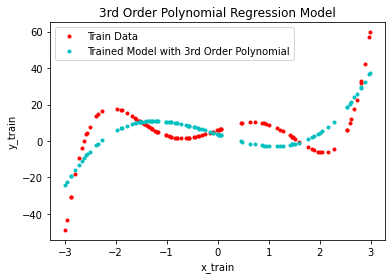

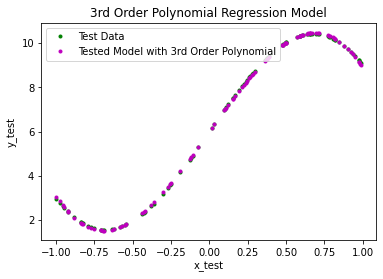

In [501]:
# Adding Cube of x as Feature
x_train_cube = (x_train**3).reshape(100,1)
x_test_cube = (x_test**3).reshape(100,1)
# Modeling Train Data
x_train_3 = np.reshape(x_train_2,(100,3))
x_train_3 = np.append(x_train_3,x_train_cube,axis=1)
theta_train_3 = np.linalg.inv(x_train_3.T.dot(x_train_3)).dot(x_train_3.T).dot(y_train)
print(theta_train_3)
# Modeling Test Data
x_test_3 = np.reshape(x_test_2,(100,3))
x_test_3 = np.append(x_test_3,x_test_cube,axis=1)
theta_test_3 = np.linalg.inv(x_test_3.T.dot(x_test_3)).dot(x_test_3.T).dot(y_test)
print(theta_test_3)
# Predicted Model
y_train_pred_3 = x_train_3.dot(theta_train_3)
y_test_pred_3 = x_test_3.dot(theta_test_3)
# Plotting Linear Regression Model with 3rd Order Polynomial Basis Function using Train Data
f = plt.figure(5)
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,y_train_pred_3,'c.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(['Train Data','Trained Model with 3rd Order Polynomial'],loc='upper left')
plt.title('3rd Order Polynomial Regression Model')
f.show()
# Plotting Linear Regression Model with 3rd Order Polynomial Basis Function using Test Data
g = plt.figure(6)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_3,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend(['Test Data', 'Tested Model with 3rd Order Polynomial'],loc='upper left')
plt.title('3rd Order Polynomial Regression Model')
g.show()

**Least Square Error for 3rd Order Basis Function**

In [502]:
lse_train_3 = np.sum(np.square(y_train - y_train_pred_3))/(2*100)
lse_test_3 = np.sum(np.square(y_test - y_test_pred_3))/(2*100)
print("Least square error for the trained 3rd order linear regression model is "+str(lse_train_3))
print("Least square error for the tested 3rd order linear regression model is "+str(lse_test_3))

Least square error for the trained 3rd order linear regression model is 40.538870728826794
Least square error for the tested 3rd order linear regression model is 0.0008231600947615668


**Linear Regression Model with 4th Order Basis Function**

[ 3.07438952 -8.86005275  0.9152175   2.14780577 -0.06736536]
[[ 6.01664629]
 [ 9.72939984]
 [-0.07886304]
 [-6.8362774 ]
 [ 0.07339789]]


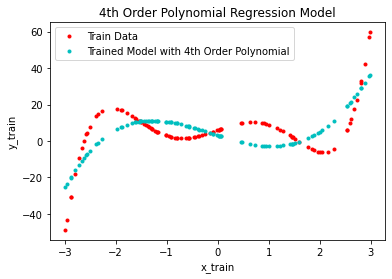

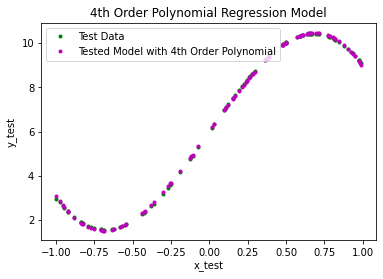

In [503]:
# Adding quartic of x as Feature
x_train_quartic = (x_train**4).reshape(100,1)
x_test_quartic = (x_test**4).reshape(100,1)
# Modeling Train Data
x_train_4 = np.reshape(x_train_3,(100,4))
x_train_4 = np.append(x_train_4,x_train_quartic,axis=1)
theta_train_4 = np.linalg.inv(x_train_4.T.dot(x_train_4)).dot(x_train_4.T).dot(y_train)
print(theta_train_4)
# Modeling Test Data
x_test_4 = np.reshape(x_test_3,(100,4))
x_test_4 = np.append(x_test_4,x_test_quartic,axis=1)
theta_test_4 = np.linalg.inv(x_test_4.T.dot(x_test_4)).dot(x_test_4.T).dot(y_test)
print(theta_test_4)
# Predicted Model
y_train_pred_4 = x_train_4.dot(theta_train_4)
y_test_pred_4 = x_test_4.dot(theta_test_4)
# Plotting Linear Regression Model with 4th Order Polynomial Basis Function using Train Data
f = plt.figure(7)
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,y_train_pred_4,'c.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(['Train Data','Trained Model with 4th Order Polynomial'],loc='upper left')
plt.title('4th Order Polynomial Regression Model')
f.show()
# Plotting Linear Regression Model with 4th Order Polynomial Basis Function using Test Data
g = plt.figure(8)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_4,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend(['Test Data', 'Tested Model with 4th Order Polynomial'],loc='upper left')
plt.title('4th Order Polynomial Regression Model')
g.show()

**Least Square Error for 4th Order Basis Function**

In [504]:
lse_train_4 = np.sum(np.square(y_train - y_train_pred_4))/(2*100)
lse_test_4 = np.sum(np.square(y_test - y_test_pred_4))/(2*100)
print("Least square error for the trained 4th order linear regression model is "+str(lse_train_4))
print("Least square error for the tested 4th order linear regression model is "+str(lse_test_4))

Least square error for the trained 4th order linear regression model is 40.45177299356291
Least square error for the tested 4th order linear regression model is 0.0008055307631746294


**Linear Regression Model with 5th Order Basis Function**

[ 6.00000000e+00  1.00000000e+01 -7.77156117e-15 -8.00000000e+00
  6.66133815e-16  1.00000000e+00]
[[ 6.00000000e+00]
 [ 1.00000000e+01]
 [-1.68753900e-14]
 [-8.00000000e+00]
 [ 7.01660952e-14]
 [ 1.00000000e+00]]


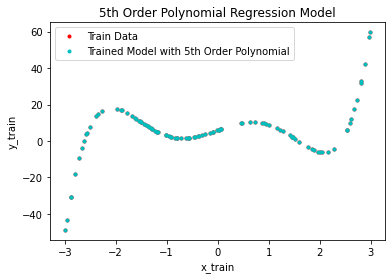

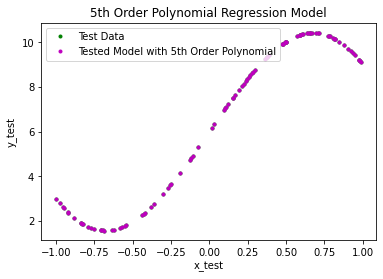

In [505]:
# Adding quintic of x as Feature
x_train_quintic = (x_train**5).reshape(100,1)
x_test_quintic = (x_test**5).reshape(100,1)
# Modeling Train Data
x_train_5 = np.reshape(x_train_4,(100,5))
x_train_5 = np.append(x_train_5,x_train_quintic,axis=1)
theta_train_5 = np.linalg.inv(x_train_5.T.dot(x_train_5)).dot(x_train_5.T).dot(y_train)
print(theta_train_5)
# Modeling Test Data
x_test_5 = np.reshape(x_test_4,(100,5))
x_test_5 = np.append(x_test_5,x_test_quintic,axis=1)
theta_test_5 = np.linalg.inv(x_test_5.T.dot(x_test_5)).dot(x_test_5.T).dot(y_test)
print(theta_test_5)
# Predicted Model
y_train_pred_5 = x_train_5.dot(theta_train_5)
y_test_pred_5 = x_test_5.dot(theta_test_5)
# Plotting Linear Regression Model with 5th Order Polynomial Basis Function using Train Data
f = plt.figure(9)
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,y_train_pred_5,'c.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(['Train Data','Trained Model with 5th Order Polynomial'],loc='upper left')
plt.title('5th Order Polynomial Regression Model')
f.show()
# Plotting Linear Regression Model with 5th Order Polynomial Basis Function using Test Data
g = plt.figure(10)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_5,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend(['Test Data', 'Tested Model with 5th Order Polynomial'],loc='upper left')
plt.title('5th Order Polynomial Regression Model')
g.show()

**Least Square Error for 5th Order Basis Function**

In [506]:
lse_train_5 = np.sum(np.square(y_train - y_train_pred_5))/(2*100)
lse_test_5 = np.sum(np.square(y_test - y_test_pred_5))/(2*100)
print("Least square error for the trained 5th order linear regression model is "+str(lse_train_5))
print("Least square error for the tested 5th order linear regression model is "+str(lse_test_5))

Least square error for the trained 5th order linear regression model is 1.3738994303212854e-26
Least square error for the tested 5th order linear regression model is 2.9074644557707236e-27


**Linear Regression Model with 6th Order Basis Function**

[ 6.00000000e+00  1.00000000e+01 -4.44089210e-14 -8.00000000e+00
  3.44169138e-14  1.00000000e+00 -3.41393580e-15]
[[ 6.00000000e+00]
 [ 1.00000000e+01]
 [ 4.54747351e-13]
 [-8.00000000e+00]
 [-4.83169060e-13]
 [ 1.00000000e+00]
 [-3.41060513e-13]]


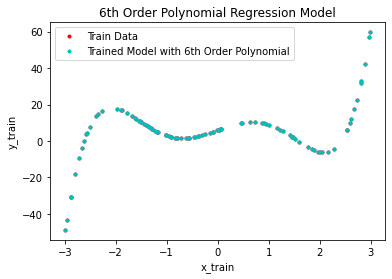

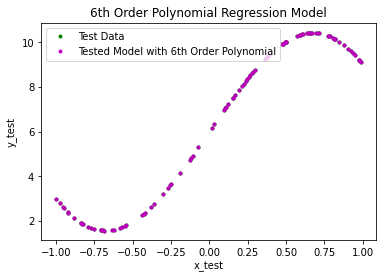

In [507]:
# Adding hexic of x as Feature
x_train_hexic = (x_train**6).reshape(100,1)
x_test_hexic = (x_test**6).reshape(100,1)
# Modeling Train Data
x_train_6 = np.reshape(x_train_5,(100,6))
x_train_6 = np.append(x_train_6,x_train_hexic,axis=1)
theta_train_6 = np.linalg.inv(x_train_6.T.dot(x_train_6)).dot(x_train_6.T).dot(y_train)
print(theta_train_6)
# Modeling Test Data
x_test_6 = np.reshape(x_test_5,(100,6))
x_test_6 = np.append(x_test_6,x_test_hexic,axis=1)
theta_test_6 = np.linalg.inv(x_test_6.T.dot(x_test_6)).dot(x_test_6.T).dot(y_test)
print(theta_test_6)
# Predicted Model
y_train_pred_6 = x_train_6.dot(theta_train_6)
y_test_pred_6 = x_test_6.dot(theta_test_6)
# Plotting Linear Regression Model with 6th Order Polynomial Basis Function using Train Data
f = plt.figure(11)
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,y_train_pred_6,'c.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(['Train Data','Trained Model with 6th Order Polynomial'],loc='upper left')
plt.title('6th Order Polynomial Regression Model')
f.show()
# Plotting Linear Regression Model with 6th Order Polynomial Basis Function using Test Data
g = plt.figure(12)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_6,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend(['Test Data', 'Tested Model with 6th Order Polynomial'],loc='upper left')
plt.title('6th Order Polynomial Regression Model')
g.show()

**Least Square Error for 6th Order Basis Function**

In [508]:
lse_train_6 = np.sum(np.square(y_train - y_train_pred_6))/(2*100)
lse_test_6 = np.sum(np.square(y_test - y_test_pred_6))/(2*100)
print("Least square error for the trained 6th order linear regression model is "+str(lse_train_6))
print("Least square error for the tested 6th order linear regression model is "+str(lse_test_6))

Least square error for the trained 6th order linear regression model is 6.118686602091724e-25
Least square error for the tested 6th order linear regression model is 9.932724904822402e-27


**Linear Regression Model with 7th Order Basis Function**

[ 6.00000000e+00  1.00000000e+01  6.09290396e-13 -8.00000000e+00
 -1.39221967e-13  1.00000000e+00  9.58955138e-15  6.27276009e-14]
[[ 6.00000000e+00]
 [ 1.00000000e+01]
 [ 5.76250159e-12]
 [-8.00000000e+00]
 [-8.17834689e-12]
 [ 1.00000000e+00]
 [ 3.73923115e-12]
 [-4.25757207e-11]]


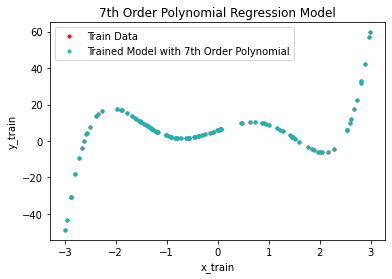

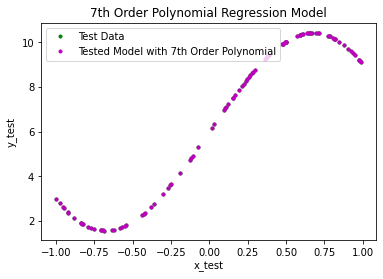

In [509]:
# Adding heptic of x as Feature
x_train_heptic = (x_train**7).reshape(100,1)
x_test_heptic = (x_test**7).reshape(100,1)
# Modeling Train Data
x_train_7 = np.reshape(x_train_6,(100,7))
x_train_7 = np.append(x_train_7,x_train_heptic,axis=1)
theta_train_7 = np.linalg.inv(x_train_7.T.dot(x_train_7)).dot(x_train_7.T).dot(y_train)
print(theta_train_7)
# Modeling Test Data
x_test_7 = np.reshape(x_test_6,(100,7))
x_test_7 = np.append(x_test_7,x_test_heptic,axis=1)
theta_test_7 = np.linalg.inv(x_test_7.T.dot(x_test_7)).dot(x_test_7.T).dot(y_test)
print(theta_test_7)
# Predicted Model
y_train_pred_7 = x_train_7.dot(theta_train_7)
y_test_pred_7 = x_test_7.dot(theta_test_7)
# Plotting Linear Regression Model with 7th Order Polynomial Basis Function using Train Data
f = plt.figure(13)
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,y_train_pred_7,'c.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend(['Train Data','Trained Model with 7th Order Polynomial'],loc='upper left')
plt.title('7th Order Polynomial Regression Model')
f.show()
# Plotting Linear Regression Model with 7th Order Polynomial Basis Function using Test Data
g = plt.figure(14)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_7,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend(['Test Data', 'Tested Model with 7th Order Polynomial'],loc='upper left')
plt.title('7th Order Polynomial Regression Model')
g.show()

**Least Square Error for 7th Order Basis Function**

In [510]:
lse_train_7 = np.sum(np.square(y_train - y_train_pred_7))/(2*100)
lse_test_7 = np.sum(np.square(y_test - y_test_pred_7))/(2*100)
print("Least square error for the trained 7th order linear regression model is "+str(lse_train_7))
print("Least square error for the tested 7th order linear regression model is "+str(lse_test_7))

Least square error for the trained 7th order linear regression model is 1.5694798952422684e-24
Least square error for the tested 7th order linear regression model is 6.0926151978388095e-25


**Comparison Table based on Least Square Error**

In [511]:
# Assign Data
mydata = [["Linear/1st Order", lse_train_1, lse_test_1, "Not a good fit"],["2nd Order", lse_train_2, lse_test_2, "Not a good fit"],
          ["3rd Order", lse_train_3, lse_test_3, "Not a good fit"],["4th Order", lse_train_4, lse_test_4, "Not a good fit"],
          ["5th Order", lse_train_5, lse_test_5, "Perfect fit"],["6th Order", lse_train_6, lse_test_6, "Started to overfit"],
          ["7th Order", lse_train_7, lse_test_7, "Gradually Overfitting"]]
# Create Header
head = ["Linear Regression Model", "Trained Model Least Square Error", "Tested Model Least Square Error", "Comment"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+---------------------------+------------------------------------+-----------------------------------+-----------------------+
| Linear Regression Model   |  Trained Model Least Square Error  |  Tested Model Least Square Error  | Comment               |
+===========================+====================================+===================================+=======================+
| Linear/1st Order          |              84.6674               |             0.585154              | Not a good fit        |
+---------------------------+------------------------------------+-----------------------------------+-----------------------+
| 2nd Order                 |              84.6657               |             0.569645              | Not a good fit        |
+---------------------------+------------------------------------+-----------------------------------+-----------------------+
| 3rd Order                 |              40.5389               |            0.00082316             | Not a go

**Final Answer**

***After training and testing our data with different types of linear and polynomial basis function, we can easily notice that polynomial basis function is a better fit for our data. As 5th order basis function is giving least error, so we can say it is a perfect fit for the data while 6th or higher order basis function start giving overfitted data and larger error than 5th order.*** 



**Problem 2**

#####Imagine that you are a realtor in Stillwater. You have data points that correspond to the recent sales of different houses in and around Stillwater. Your goal is to help estimate the prices of houses that one can use to sell or buy listings. Can you use your knowledge of linear regression to find the best regression model? Use your implementation from Question 1 (without any basis functions) to answer the following questions. <br>
1. What is the average least squares error for the given data using your simple linear regression model?
2. Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?
3. Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?




**Solution 2**

**Libraries**

In [512]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Loading Data**

In [513]:
data = pd.read_csv('/content/sample_data/Assignment1_Q2_Data.csv')
# Show Data Type
print('Data type:', data.dtypes)
print('Data Shape:', data.shape)

Data type: House ID               int64
Local Price          float64
Bathrooms            float64
Land Area            float64
Living area          float64
# Garages            float64
# Rooms                int64
# Bedrooms             int64
Age of home            int64
Construction type      int64
Architecture type      int64
# Fire places          int64
Price (1000$)        float64
dtype: object
Data Shape: (28, 13)


**Spliting Train and Test Data**

In [514]:
# Train Data
data_train= data[0:18]
x_train=data_train.iloc[:,1:12].values
print(x_train.shape)
y_train= data_train.iloc[:,12].values
print(y_train.shape)
# Train Data
data_test= data[18:]
x_test = data_test.iloc[:,1:12].values
print(x_test.shape)
y_test= data_test.iloc[:,12].values
print(y_test.shape)

(18, 11)
(18,)
(10, 11)
(10,)


**2.1 What is the average least squares error for the given data using your simple linear regression model?**

We will use first 18 rows as training data set and last 10 rows as test data set. As we used Linear regression with Normal equation (without basis function) for Q1, we will implement that over here.

[20.04692057  2.48971532 22.76277055 -0.09954098  2.10212676  1.58283592
 -8.39396231  7.31574099  0.05130734 -1.35776322 -0.99222408  5.86859344]
[ 117.9375        3.53189697 -146.08847656    3.384021    109.64960938
  -32.66582031  -34.30908203   60.26220703   -1.12122803    5.86977539
  -12.00854492   38.03515625]


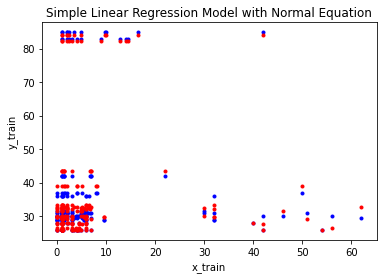

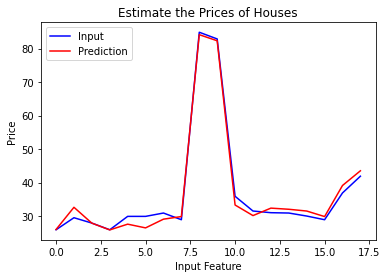

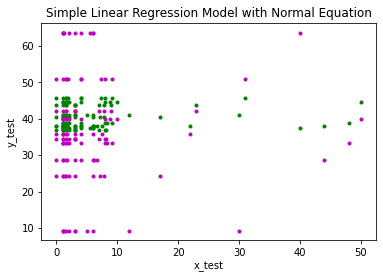

In [515]:
# Adding Bias
bias_train=np.ones((18,1))
bias_test=np.ones((10,1))
# Modeling Train Data
x_train_1=np.append(bias_train,x_train,axis=1)
theta_train_1 = np.linalg.inv(x_train_1.T.dot(x_train_1)).dot(x_train_1.T).dot(y_train)
print(theta_train_1)
# Modeling Test Data
x_test_1=np.append(bias_test,x_test,axis=1)
theta_test_1 = np.linalg.inv(x_test_1.T.dot(x_test_1)).dot(x_test_1.T).dot(y_test)
print(theta_test_1)
# Predicted Model
y_train_pred_1 = x_train_1.dot(theta_train_1)
y_test_pred_1 = x_test_1.dot(theta_test_1)
# Plotting Linear Regression Model with Normal Equation using Train Data
f = plt.figure(15)
plt.plot(x_train,y_train,'b.')
plt.plot(x_train,y_train_pred_1,'r.')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Simple Linear Regression Model with Normal Equation')
f.show()
# Estimate the prices of houses
h = plt.figure(16)
x_out_1=np.arange(0,18,1)
y_out_1=y_train.reshape(18,1)
plt.plot(x_out_1,y_train,'b',label='Input')
plt.plot(x_out_1,y_train_pred_1,'r',label='Prediction')
plt.xlabel('Input Feature')
plt.ylabel('Price')
plt.legend(['Input', 'Prediction'],loc='upper left')
plt.title('Estimate the Prices of Houses')
h.show()
# Plotting Linear Regression Model with Normal Equation using Test Data
g = plt.figure(17)
plt.plot(x_test,y_test,'g.')
plt.plot(x_test,y_test_pred_1,'m.')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Simple Linear Regression Model with Normal Equation')
g.show()

In [516]:
lse_train_1 = np.sum(np.square(y_train - y_train_pred_1))/(2*18)
lse_test_1 = np.sum(np.square(y_test - y_test_pred_1))/(2*10)
print("Least square error for the trained Simple Linear Regression Model is "+str(lse_train_1))
print("Least square error for the tested Simple Linear Regression Model is "+str(lse_test_1))

Least square error for the trained Simple Linear Regression Model is 1.5133199324240103
Least square error for the tested Simple Linear Regression Model is 106.7173574252819


**The average least squares error for the given data using your simple linear regression model is 1.5133199324240103 for trained data**

**2.2 Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?**

Bathrooms has the most effect on the final value. you know this from the value of thetas.

In [517]:
print(theta_train_1)

[20.04692057  2.48971532 22.76277055 -0.09954098  2.10212676  1.58283592
 -8.39396231  7.31574099  0.05130734 -1.35776322 -0.99222408  5.86859344]


#####Here you can see, 3rd value (**22.76277055**) of theta is maximum and that 3rd value corresponds to 2nd feature which is **bathrooms**. So, "bathrooms" has the most effect on the final value.

Now we will use only the "bathrooms" feature to predict the price.

In [518]:
# Train Data
data_train= data[0:18]
x_train=(data_train.iloc[:,2].values).reshape(18,1)
print(x_train.shape)
y_train= data_train.iloc[:,12].values
print(y_train.shape)
# Train Data
data_test= data[18:]
x_test = (data_test.iloc[:,2].values).reshape(10,1)
print(x_test.shape)
y_test= data_test.iloc[:,12].values
print(y_test.shape)

(18, 1)
(18,)
(10, 1)
(10,)


[-5.83513514 34.93783784]
[36.44285714  2.99047619]


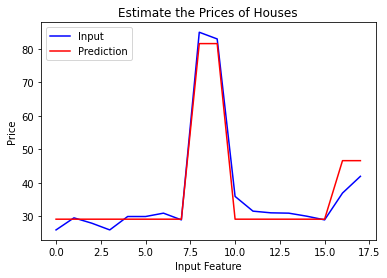

In [519]:
# Adding Bias
bias_train=np.ones((18,1))
bias_test=np.ones((10,1))
# Modeling Train Data
x_train_1=np.append(bias_train,x_train,axis=1)
theta_train_1 = np.linalg.inv(x_train_1.T.dot(x_train_1)).dot(x_train_1.T).dot(y_train)
print(theta_train_1)
# Modeling Test Data
x_test_1=np.append(bias_test,x_test,axis=1)
theta_test_1 = np.linalg.inv(x_test_1.T.dot(x_test_1)).dot(x_test_1.T).dot(y_test)
print(theta_test_1)
# Predicted Model
y_train_pred_1 = x_train_1.dot(theta_train_1)
y_test_pred_1 = x_test_1.dot(theta_test_1)
# Estimate the prices of houses
h = plt.figure(18)
x_out_1=np.arange(0,18,1)
y_out_1=y_train.reshape(18,1)
plt.plot(x_out_1,y_train,'b',label='Input')
plt.plot(x_out_1,y_train_pred_1,'r',label='Prediction')
plt.xlabel('Input Feature')
plt.ylabel('Price')
plt.legend(['Input', 'Prediction'],loc='upper left')
plt.title('Estimate the Prices of Houses')
h.show()

In [520]:
lse_train_1 = np.sum(np.square(y_train - y_train_pred_1))/(2*18)
lse_test_1 = np.sum(np.square(y_test - y_test_pred_1))/(2*10)
print("Least square error for the trained Simple Linear Regression Model is "+str(lse_train_1))
#print("Least square error for the tested Simple Linear Regression Model is "+str(lse_test_1))

Least square error for the trained Simple Linear Regression Model is 5.974496996997006


**Using only bathrooms as feature, although we get a higher error (almost 5 times higher for training data) due to  linear function, but the prediction is not that bad. Although it will not result in a good prediction, We can still use it to have some insights.**


**2.3 Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?**


Again from the values of theta, 9th value (**0.05130734**) is closet to Zero and that 9th value corresponds to 8th feature which is **Age of home**. So, "Age of home" has the least effect on the final value.

In [521]:
# Removing feature with the least effect
new_data=data.loc[:, data.columns != 'Age of home']
print('Data Shape:', new_data.shape)

Data Shape: (28, 12)


Now we will remove only the "Age of home" feature and again predict the price.

In [522]:
# Train Data
data_train= new_data[0:18]
x_train=data_train.iloc[:,1:11].values
print(x_train.shape)
y_train= data_train.iloc[:,11].values
print(y_train.shape)
# Train Data
data_test= new_data[18:]
x_test = data_test.iloc[:,1:11].values
print(x_test.shape)
y_test= data_test.iloc[:,11].values
print(y_test.shape)

(18, 10)
(18,)
(10, 10)
(10,)


[22.50861666  2.54529555 20.62980335 -0.2760444   3.15104891  1.54142716
 -7.90310435  6.85630943 -1.21755292 -1.57170462  5.77285692]
[ 4.91702578e+01 -7.10439956e+00  2.09844812e+01 -1.67037829e+00
 -8.29314964e+01  2.69326512e+01  2.90537551e+01 -4.29156775e+01
  2.07085081e-02 -1.18904108e+01 -3.94121572e+00]


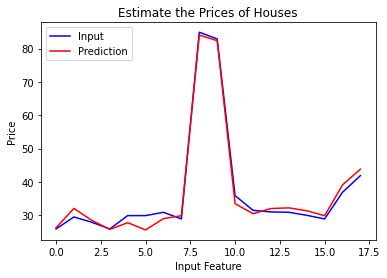

In [523]:
# Adding Bias
bias_train=np.ones((18,1))
bias_test=np.ones((10,1))
# Modeling Train Data
x_train_1=np.append(bias_train,x_train,axis=1)
theta_train_1 = np.linalg.inv(x_train_1.T.dot(x_train_1)).dot(x_train_1.T).dot(y_train)
print(theta_train_1)
# Modeling Test Data
x_test_1=np.append(bias_test,x_test,axis=1)
theta_test_1 = np.linalg.inv(x_test_1.T.dot(x_test_1)).dot(x_test_1.T).dot(y_test)
print(theta_test_1)
# Predicted Model
y_train_pred_1 = x_train_1.dot(theta_train_1)
y_test_pred_1 = x_test_1.dot(theta_test_1)
# Estimate the prices of houses
h = plt.figure(18)
x_out_1=np.arange(0,18,1)
y_out_1=y_train.reshape(18,1)
plt.plot(x_out_1,y_train,'b',label='Input')
plt.plot(x_out_1,y_train_pred_1,'r',label='Prediction')
plt.xlabel('Input Feature')
plt.ylabel('Price')
plt.legend(['Input', 'Prediction'],loc='upper left')
plt.title('Estimate the Prices of Houses')
h.show()

In [524]:
lse_train_1 = np.sum(np.square(y_train - y_train_pred_1))/(2*18)
lse_test_1 = np.sum(np.square(y_test - y_test_pred_1))/(2*10)
print("Least square error for the trained Simple Linear Regression Model is "+str(lse_train_1))
#print("Least square error for the tested Simple Linear Regression Model is "+str(lse_test_1))

Least square error for the trained Simple Linear Regression Model is 1.5675095842773887


**Removing the least effective feature Age of home, we can see, it does not affect the error that much. The increase in error is negligible. So, the prediction is not bad from the original value. It performs well.**

**Problem 3**

#####Implement a locally weighted linear regression model for the data from Question 1. Refer to Slide 33 from Lecture 4 for reference. You should implement your own version of linear regression either using gradient descent or normal equations. **You SHOULD NOT use any pre-packaged library such as Sci-Kit Learn.** <br>
#####Answer the following questions:
1.   Do you need any basis functions when using the locally weighted approach?
2.   What is the difference between this implementation and the one for Question 1?



**Solution 3**

**Libraries**

In [525]:
import numpy as np
import matplotlib.pyplot as plt

**Loading Data**

In [526]:
x_train = np.load('/content/sample_data/x_train.npy')
y_train = (np.load('/content/sample_data/y_train.npy')).reshape(100,1)
x_test = np.load('/content/sample_data/x_test.npy')
y_test = np.load('/content/sample_data/y_test.npy')
# Show Data Type
print('Data type:', type(x_train))
print('x_train Data Shape:', x_train.shape)
print('y_train Data Shape:', y_train.shape)
print('x_test Data Shape:', x_test.shape)
print('y_test Data Shape:', y_test.shape)

Data type: <class 'numpy.ndarray'>
x_train Data Shape: (100, 1)
y_train Data Shape: (100, 1)
x_test Data Shape: (100, 1)
y_test Data Shape: (100, 1)


**3.1 Do you need any basis functions when using the locally weighted approach?**

First, we will do locally weighted logistic regression. In this method, we need the training data for making predictions at each instance with considering some local weights to each example in the training data set.

**Compute Weight Matrix**

In [527]:
def Weight_Matrix(xi,x,bw): 
    example = x.shape[0] 
    I = np.mat(np.eye(example)) # Identity Matrix
    for i in range(example): 
        I[i,i] = np.exp(np.dot((x[i]-xi),(x[i]-xi).T)/(-2*(bw)**2))         
    return I

**Compute Theta for Every Point**

In [528]:
def predict(x,y,xi,bw): 
    example = x.shape[0] 
    xn = np.append(x, np.ones(example).reshape(example,1), axis=1)  
    xii = np.array([xi,1]) 
    I = Weight_Matrix(xii,xn,bw) 
    theta = np.linalg.pinv(xn.T*(I*xn))*(xn.T*(I*y))  
    pred = np.dot(xii, theta) 
    return theta, pred

**Plotting Data**

In [529]:
def plt_predict(x,y,bw,intv):
    t = np.linspace(-3, 3, intv)
    store = []
    for xi in t: 
        theta, st = predict(x,y,xi,bw) 
        store.append(st)
    t = np.array(t).reshape(intv,1)
    store = np.array(store).reshape(intv,1)

    plt.plot(x,y,'r.')
    plt.plot(t,store,'g.')
    plt.show()

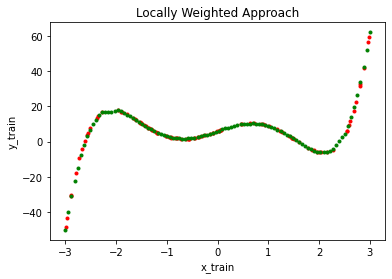

In [530]:
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Locally Weighted Approach')
plt_predict(x_train, y_train, 0.09, 100)

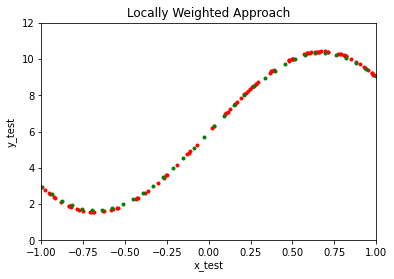

In [531]:
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Locally Weighted Approach')
plt.xlim(-1, 1)
plt.ylim(0, 12)
plt_predict(x_test, y_test, 0.09, 100)

**It fits the data very well. We don't need any basis functions when using the locally weighted approach. It may overfit with basis function.**


**3.2 What is the difference between this implementation and the one for Question 1?**

#####Traditional Linear regression models like linear or polynomial regression are parametric. Normal Equations approach doesn't fit well with Non-linear data like this. Again, polynomial models with basis function may fit well but computationally csotly. <br>
#####But locally weighted approach make predictions at each instance with considering some local weights to each example in the training data set. By this way it minimize the cost function as well as error. <br>
#####So, Locally weighted approach doees good with this Non-linear data set we have. But we have to be careful about overfit.